# Задание
- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализация числовых признаков.

# Подключение библиотек

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ход работы
## Выбор и описание датасета
Выбор пал на датасет с ценами машин

In [37]:
# Импорт датасета
df = pd.read_csv('car_prices.csv')

# Вывод первых 5 строк
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Используем только несколько из предложенных признаков:

In [38]:
cols_filter = ['year', 'make', 'model', 'body',
        'vin', 'odometer']
data = df[cols_filter]
data.head()

,year,make,model,body,vin,odometer
0,2015,Kia,Sorento,SUV,5xyktca69fg566472,16639.0
1,2015,Kia,Sorento,SUV,5xyktca69fg561319,9393.0
2,2014,BMW,3 Series,Sedan,wba3c1c51ek116351,1331.0
3,2015,Volvo,S60,Sedan,yv1612tb4f1310987,14282.0
4,2014,BMW,6 Series Gran Coupe,Sedan,wba6b2c57ed129731,2641.0


In [13]:
hdata = data
list(zip(hdata.columns, [i for i in data.dtypes]))

[('year', dtype('int64')),
 ('make', dtype('O')),
 ('model', dtype('O')),
 ('body', dtype('O')),
 ('vin', dtype('O')),
 ('odometer', dtype('float64'))]

Выведем колонки в которых присутствуют пропуски:

In [14]:
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['make', 'model', 'body', 'odometer']

In [15]:
hdata.shape

(418960, 6)

Выведем количество пропусках в тех колонках, которые вывелись в предыдущем блоке:

In [16]:
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('make', 7473), ('model', 7544), ('body', 10346), ('odometer', 88)]

Выведем ту же самую информацию, но в процентном виде :

In [17]:
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('make', 0.017837025014321176),
 ('model', 0.018006492266564828),
 ('body', 0.024694481573419896),
 ('odometer', 0.0002100439182738209)]

Далее создадим переменную, в которой будут храниться колонки с пропусками:

In [18]:
hcols_with_na_temp = ['make', 'model', 'body', 'odometer']

Удалим пропуски:

In [19]:
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(408463, 4)

In [20]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure(figsize=(18, 8))
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

С помощью столбчатой диаграммы покажем разницу между распределениями до и после устранения признаков:

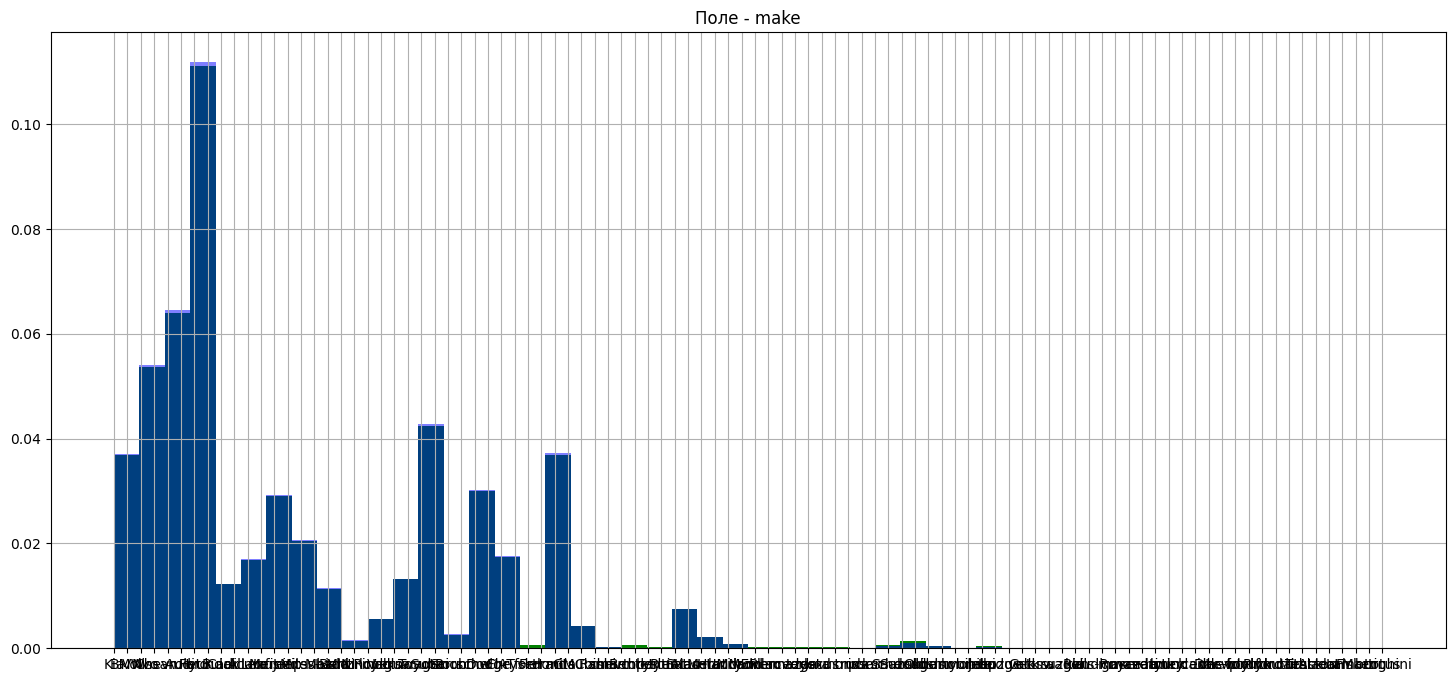

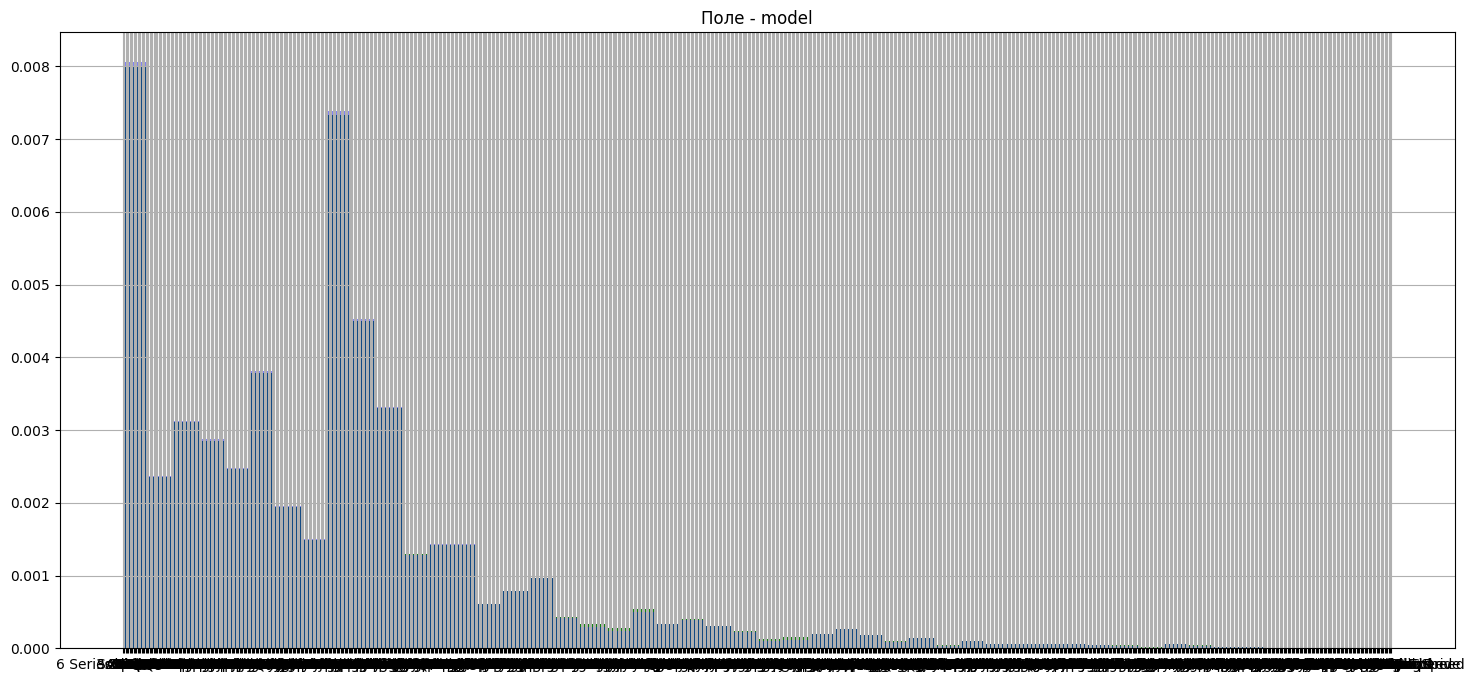

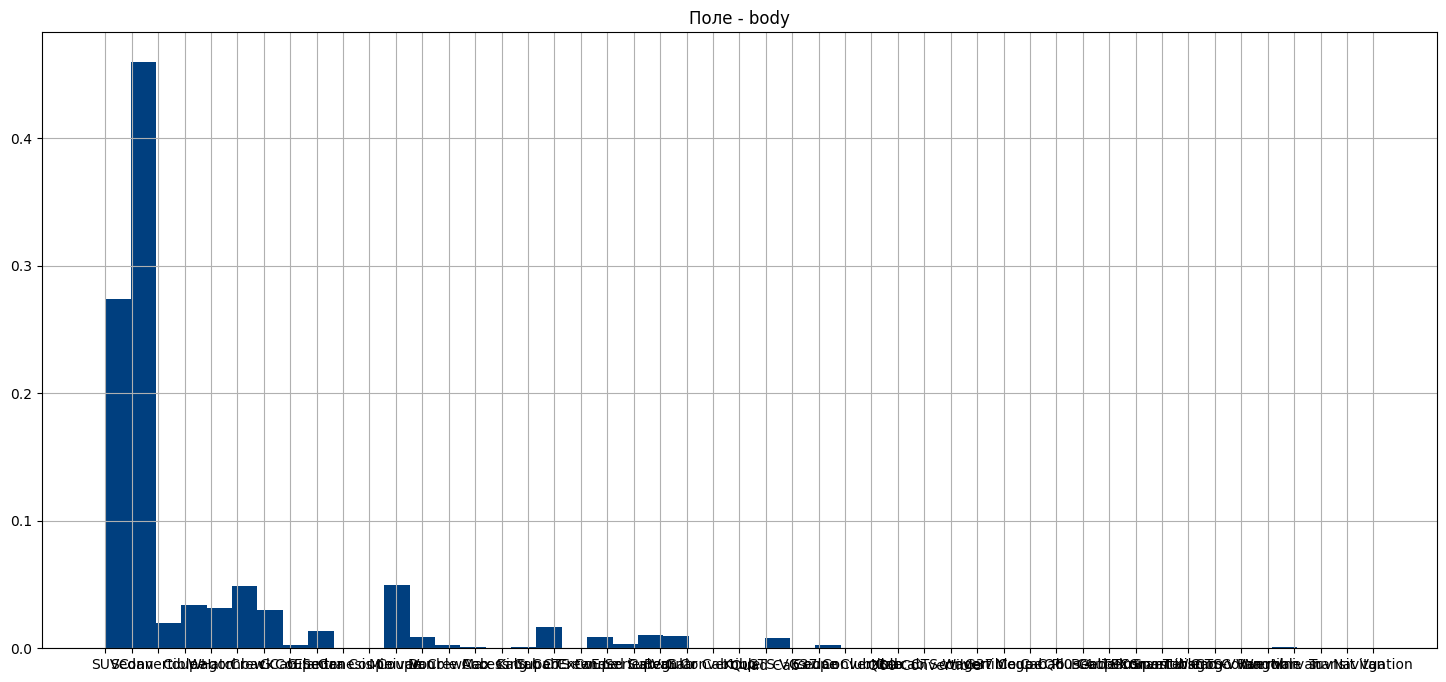

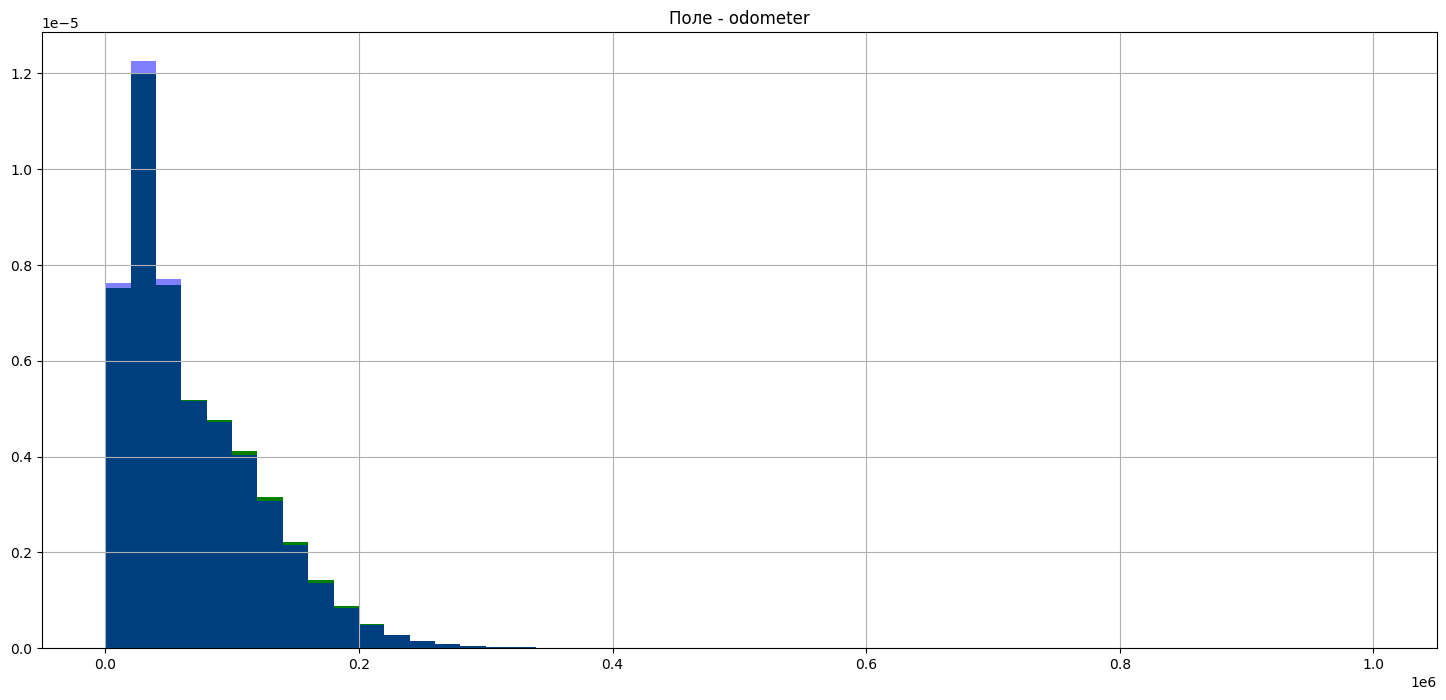

In [21]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

Лучше всего видно изменения на диаграмме поля odometer

## Кодирование категориальных признаков
- Проведём кодирование категорилального признака preferred_device с использованием метода "one-hot encoding".
- One-hot encoding предполагает, что значение категории заменяется на отдельную колонку, которая содержит бинарные значения.
- Преимущества:
    - Простота реализации.
    - Подходит для любых моделей, так как НЕ создает фиктивное отношение порядка между значениями.
- Недостатки:
    - Расширяется признаковое пространство.

In [28]:
pd.get_dummies(data[['model']]).head()

,model_1,model_1 Series,model_1500,model_190-Class,model_2 Series,model_200,model_200SX,model_2500,model_3,model_3 Series,...,model_wave,model_windstar,model_wrangler,model_x-trail,model_x3,model_xA,model_xB,model_xD,model_yaris,model_yukon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['model']], dummy_na=True).head()

,model_1,model_1 Series,model_1500,model_190-Class,model_2 Series,model_200,model_200SX,model_2500,model_3,model_3 Series,...,model_windstar,model_wrangler,model_x-trail,model_x3,model_xA,model_xB,model_xD,model_yaris,model_yukon,model_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Нормализация числовых признаков
- Проведём нормализацию числовых признаков через использование межквартильного размаха
- Межквартильный размах IQR (interquartile range, IQR) - это разность третьего квартиля и первого квартиля:

In [30]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [31]:
data.shape

(418960, 6)

In [35]:
filtered_dataset = remove_outliers_iqr(data, 'odometer')
filtered_dataset.shape

(411973, 6)